# Opinião de usuários de twitter sobre empresas americanas de aviação

Este caderno contêm o trabalho dos alunos Henrique Hideki, Lucas Nascimento e Mauro Floriano, estudantes do curso
de Engenharia de Computação da instituição CEFET-MG, para a matéria de Aprendizado de Máquina lecionado pelo 
professor Daniel Hasan Dalip. 

O trabalho será baseado em um dataset público disponibilizado no site: 
[figure eight](https://www.figure-eight.com/data-for-everyone/).
    
Este dataset contêm textos inscritos por usuários da rede social Twitter, os chamados tweets, durante o ano de
2015 sobre algumas das principais empresas americanas de aviação. Nele possuimos diversas informações como o próprio texto que contêm a opinião ou comentário do usuário sobre entre outros dados como pode ser visto abaixo:

In [1]:
from airlines_analysis.analysis import Analysis
from airlines_analysis.enums import SentimentEnum

analysis = Analysis()
analysis.df

[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,681679794,False,finalized,3,2/25/15 19:46,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/15 12:01,5.695880e+17,NaN,NaN
14636,681679795,False,finalized,3,2/25/15 19:14,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/15 11:59,5.695870e+17,Texas,NaN
14637,681679796,False,finalized,3,2/25/15 19:04,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/15 11:59,5.695870e+17,"Nigeria,lagos",NaN
14638,681679797,False,finalized,3,2/25/15 18:59,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/15 11:59,5.695870e+17,New Jersey,Eastern Time (US & Canada)


## Contextualização e Motivação 

Com os dados disponibilizados nesse dataset, podemos fazer diversos estudos e análises, como saber das opiniões positivas e negativas de cada empresa, quais são os pontos que são mais falados, também podemos interpertar o texto de maneira a tentar entender se aquele comentário é positivo, negativo ou neutro.

Essa parte da inteligência artifical que tenta entender a opinião expressa em um texto de maneira a caracterizar o texto como neutro, positivo ou negativo é chamado de análise de sentimento. Essa área tem ganhado cada vez mais visibilidade, com o crescente número de dados disponibilizados pelo mundo. 

## Trabalhos Relacionados

No trabalho de Araújo et al. (2013), ele apresenta um estudo sobre vários métodos para a realizam de análise de sentimentos sobre post do twitter. O trabalho teve como objetivo preencher essa lacuna na comparação de métodos para análise de sentimento.Foi utilizado no trabalho 2 bases de dados diferentes provenientes de redes sociais online para comparar 8 métodos propostos na literatura: LIWC, Happiness Index, SentiWordNet, SASA, PANAS-t, Emoticons, SenticNet e SentiStrength. A primeira base consiste de cerca de 1,8 bilhões de mensagens coletadas do Twitter, representando um histórico completo do período coletado. Dessa base de dados foi possível  filtrar tweets associados a 6 eventos sociais relacionados a tragédias, lançamento de produtos, política, saúde e esporte. A segunda base de dados consiste de uma coleção de textos rotulados por humanos para positivo e negativo. A partir de bases de dados reais, foi comparado no trabalho os 8 métodos para análise de sentimentos em termos de abrangência (a fração de mensagens captadas por cada método) e concordância (a fração de sentimentos corretamente identificados por cada método). Entre os vários resultados encontrados, seguem alguns deles: 1.Os métodos possuem diferentes graus de abrangência, variando entre 4% e 95% quando aplicados a dados associados a eventos reais. Isso sugere que, dependendo do método utilizado, apenas uma pequena fração de mensagens será analisada, podendo levar a resultados enviesados ou não representativos. 2. Nenhum método alcançou níveis altos de abrangência e concordância ao mesmo tempo. O método Emoticons atingiu a maior acurácia (acima de 85%), porém uma das menores abrangências (4–13%). 3. A Concordância dos métodos, quando aplicados aos dados rotulados, variaram entre 33% e 80%, sugerindo que uma mesma amostra de dados pode ser interpretada de forma diferente dependendo do método escolhido. 4. Existe desacordo entre os métodos na predição de sentimentos para diferentes eventos considerados. Para o caso do evento da queda de um avião, metade dos métodos detectaram mais positividade do que negatividade. O mesmo é observado em outros eventos onde eram esperados uma maior quantidade de sentimentos negativos.


No trabalho: “Uma Ferramenta para Análise de Sentimentos em Redes Sociais Utilizando o SenticNet”, o objetivo foi criar e avaliar uma ferramenta que extrai sentimentos em mensagens textuais compartilhadas em redes sociais usando o SenticNet [Cambria et al. 2010], uma base de dados para análise de sentimentos e mineração de opinião construída por meio da sentic computing [Cambria and Hussain 2012]. Dessa forma, foi possível entender o que muitos usuários nas redes sociais estão sentindo sobre determinados assuntos em tempo real.

As conclusões sobre o uso do SenticNet é de que ele classifica coerentemente muitas mensagens, apesar de conter um número limitado de conceitos, e a base de conhecimento proporciona uma velocidade muito grande para a ferramenta, pois o conhecimento para classificação das frases já está todo embutido no RDF. O uso do SenticNet traz uma limitação em relação ao idioma usado, pois a base de conhecimento foi criada com expressões em inglês. Assim, mensagens em outras línguas não podem ser classificadas diretamente utilizando o SenticNet. Uma possível solução para este problema seria utilizar um tradutor nas mensagens compartilhadas antes de serem classificadas. Outra limitação está relacionada ao conhecimento contido no RDF. O arquivo contém muitos conceitos, mas faltam muitos outros e sempre faltarão. Com isso, algumas mensagens, por mais que tenham sentimento nelas, podem ficar com classificação neutra na ferramenta.


bibliografias:

ARAÚJO, M. et al. Métodos para análise de sentimentos no twitter. In:Proceedings of the19th Brazilian symposium on Multimedia and the Web (WebMedia’13). [S.l.: s.n.], 2013

Cambria, E. and Hussain, A. (2012). Sentic Computing: Techniques, Tools, and Applications.
Springer Netherlands.

Cambria, E., Speer, R., Havasi, C., and Hussain, A. (2010). Senticnet: A publicly available
semantic resource for opinion mining.


## Análise dos Dados e Pré-processamento

Como é possível verificar acima, os dados iniciais do dataset disponibilizado contêm diversas informações. Para a parte de análise de sentimento utilizaremo apenas duas colunas, text, que contêm o texto do tweet de cada usuário e a coluna airline_sentiment, que contêm o sentimento daquele texto já mapeado.

Apesar de utilizar apenas essas duas colunas para essa parte do trabalho, ao analisarmos algumas outras colunas, conseguimos tirar algumas conclusões válidas para o desenvolvimento, uma das colunas que tem dados importantes é a airline_sentiment:confidence, nela nos é informado a confiança do sentimento previamente analisado. Vamos analisar um pouco os dados dessa coluna abaixo: 

In [2]:
df_confindence_low = analysis.df[analysis.df["airline_sentiment:confidence"] < 0.60]

df_confindence_low.size

4760

Como é possível concluir, existem 4760 registros com uma confiabilidade menor que 60%, para nosso trabalho iremos remover esses registros para tentar tornar nosso algoritmo mais confíavel. o novo dataframe poderá ser visto a seguir

In [3]:
confident_df = analysis.remove_unconfident_sentiment(analysis.df)

confident_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
5,681448162,False,finalized,3,2/25/15 9:10,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)



Com o novo dataset, apenas com os dados que utilizaremos no trabalho, vamos agora para trabalhar um pouco na limpeza do texto dos tweets, uma prática muito comum para esse tipo de dado, como é possível analisar na tese de [Nadia Felix Felipe da Silva](https://www.teses.usp.br/teses/disponiveis/55/55134/tde-27092016-143947/publico/NadiaFelixFelipedaSilva_Revisada.pdf).

Para esse estudos iremos remover as menções, os links para sites e tags e caracteres web indesejados, com o auxilio da biblioteca chamada [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc).

In [4]:
web_cleaned_df = analysis.remove_html_and_tweet_tags(confident_df)
web_cleaned_df[['text', 'text_final']].head()

,text,text_final
0,@VirginAmerica What @dhepburn said.,What said.
2,@VirginAmerica I didn't today... Must mean I n...,I didn't today... Must mean I need to take an...
3,@VirginAmerica it's really aggressive to blast...,"it's really aggressive to blast obnoxious ""en..."
4,@VirginAmerica and it's a really big bad thing...,and it's a really big bad thing about it
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay $30 a flight for seats th...


Depois de limpar o texto e criar uma nova coluna para o mesmo alterado. Iremos colocar valor para o sentimento, alterando de neutro, negativo e positivo para 0, 1, 2 respectivamente.

In [5]:
df_work = analysis.convert_sentiment_to_scalar(web_cleaned_df)
df_work[['airline_sentiment', 'sentiment']]

,airline_sentiment,sentiment
0,neutral,0
2,neutral,0
3,negative,1
4,negative,1
5,negative,1
...,...,...
14634,negative,1
14636,negative,1
14637,neutral,0
14638,negative,1


Na tentantiva de melhorar a análise de sentimento dos textos, foi removido do texto as palavras que são consideradas irrelevante, chamada de stopwords.

In [6]:
df_work = analysis.remove_stopwords(df_work)
df_work[['text_final']].head()

,text_final
0,What said.
2,today... Must mean need take another trip!
3,"really aggressive blast obnoxious ""entertainme..."
4,really big bad thing
5,seriously would pay $30 flight seats playing. ...


Após finalizar as alterações no dado, vamos criar nosso dataframe que vamos utilizar para o algoritmo, com os dados que modificamos nas etapas anteriores.

In [7]:
all_df = df_work
df_work = df_work.loc[:, ['text_final', 'sentiment']]

df_work.head()

,text_final,sentiment
0,What said.,0
2,today... Must mean need take another trip!,0
3,"really aggressive blast obnoxious ""entertainme...",1
4,really big bad thing,1
5,seriously would pay $30 flight seats playing. ...,1


## Análise do dataset préprocessado 

Nesta parte iremos analisar o dataset, de acordo com as palavras que mais aparecem e também em gráfico mostrando as distribuições de tweets positivos, negativos e neutros. 

Abaixo é possível ver as palavras que ficam em evidência nos tweets negativos gerais.

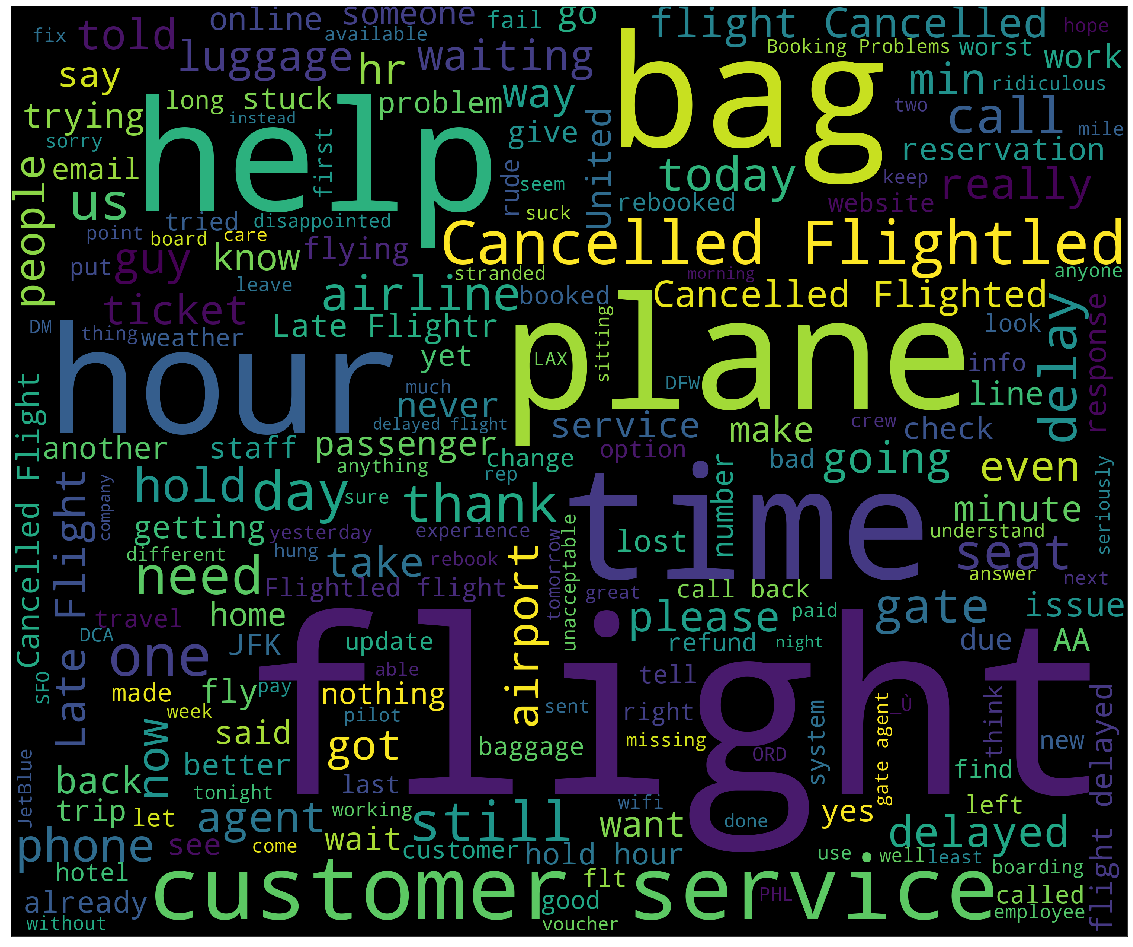

In [8]:
analysis.all_word_cloud_results(all_df)

Abaixo é possível analisar em gráfico de barras as opiniões de todo o dataset

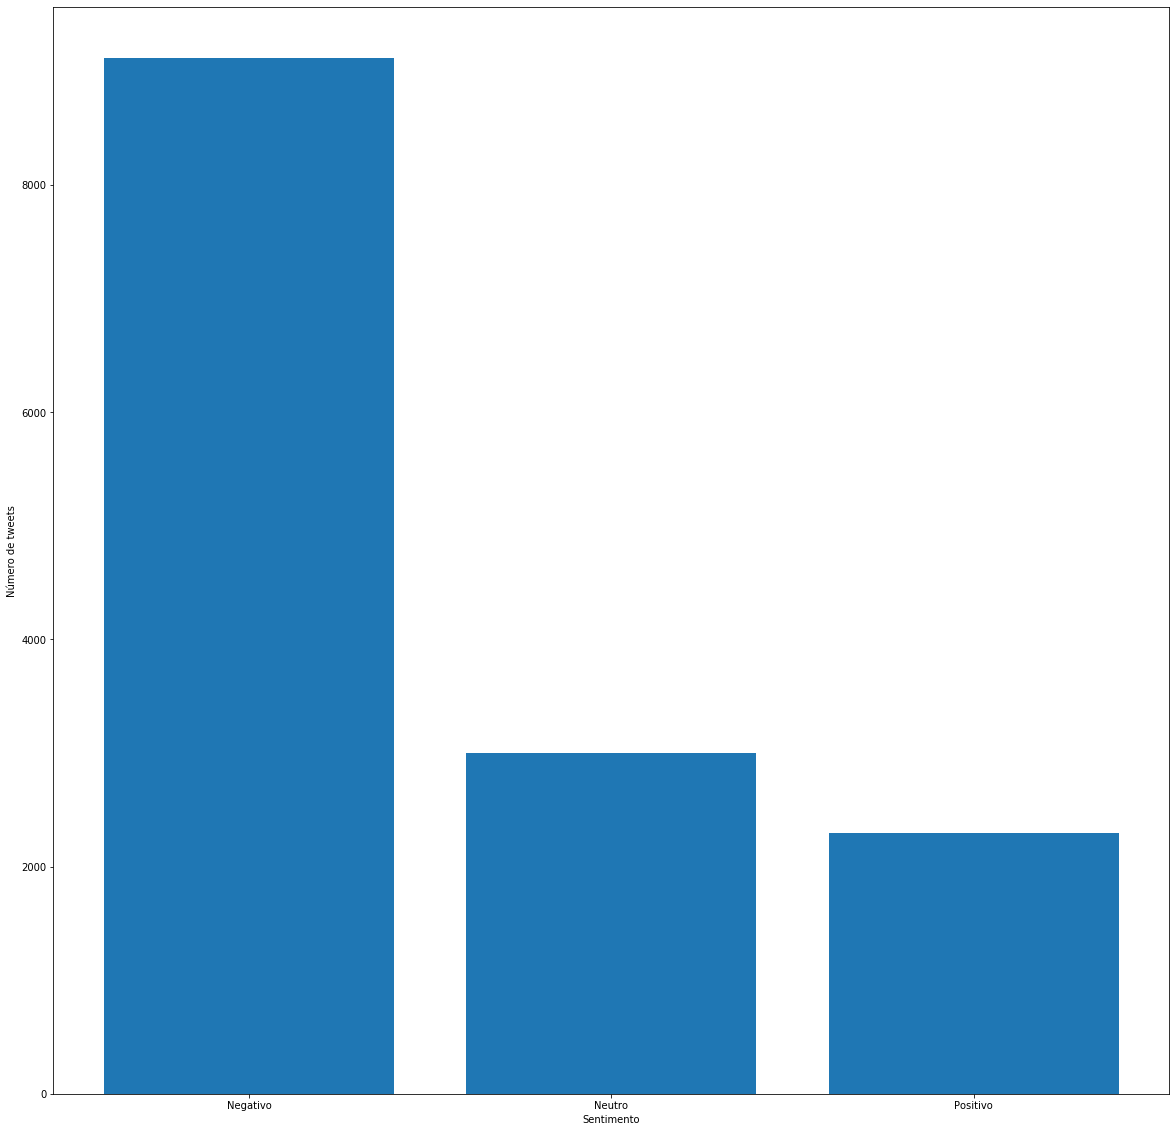

In [9]:
analysis.all_sentiment_results(all_df)

Após uma análise geral, iremos passar um pouco em cada companhia para que possamos analisar o que os usuários falam de cada companhia em seus tweets negativos, apenas separamos de acordo com a companhia aeria

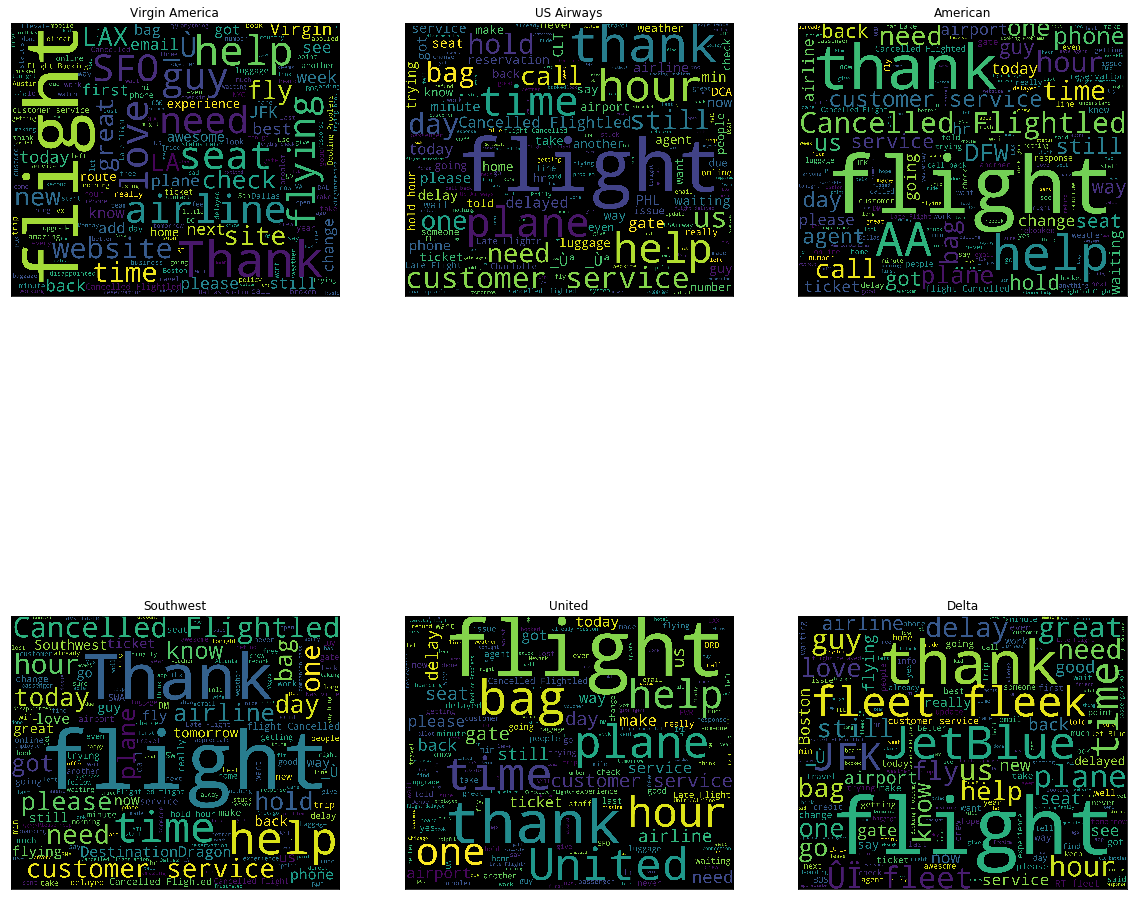

In [10]:
analysis.word_cloud_results(all_df)

Além das palavras que mais aparecem em cada companhia, também analisamos como é dispersão de cada companhia e podemos perceber que diversas companhias tem muito mais tweets negativos que os outros tipos, e essas que possuem mais negativas, também são as que são mais faladas na rede social.

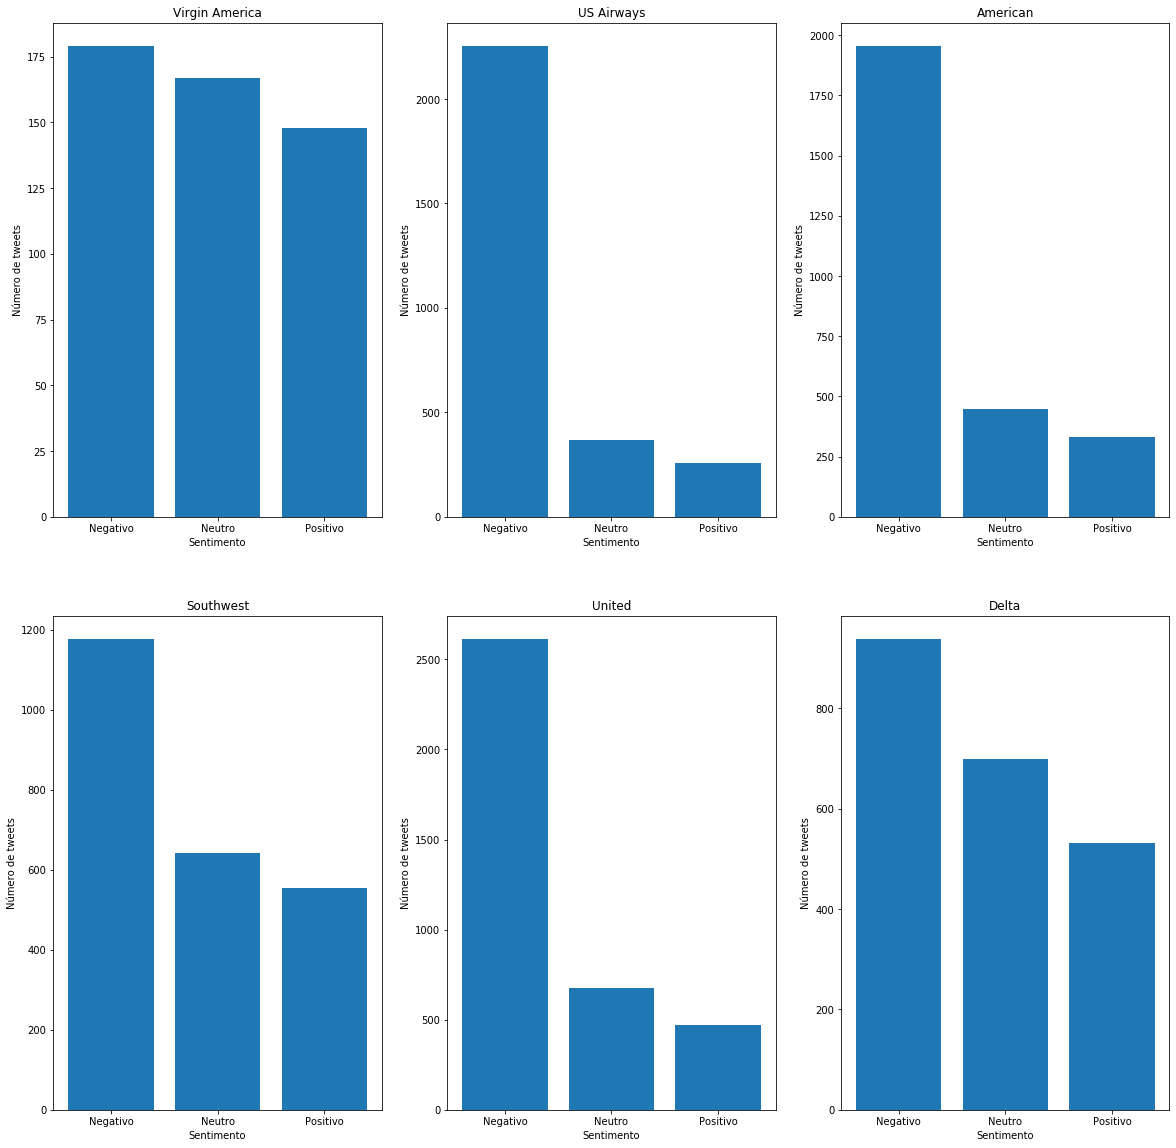

In [11]:
analysis.sentiment_results(all_df)

# Treinamento

Após todo o processamento dos dados, vamos separar o dataframe em duas partes, a parte para treino e a parte para teste, a serapação será feita da seguinte forma, 80% do dataframe será para treino e 20% para teste, essa é uma proporção comum para algoritmos de machine learning.

In [12]:
results = analysis.train(df_work)
confusion_matrix = analysis.get_confusion_matrix(results)
metrics_by_class = analysis.metrics_by_class(results)
average_metrics = analysis.average_metrics(results)

# Resultados

Os treinamentos foram executados utilizando três algoritmos, [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree), [Bernoulli Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Bernoulli_naive_Bayes) e [SVM](https://en.wikipedia.org/wiki/Support-vector_machine).

Porém ao utilizar o SVM não foi possivel obter nenhum resultado em um intervalo de 30 min para fins de perfomance foi removido desse notebook.

Com isso adicionamos mais dois algoritmos para comparação

[Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) e [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost)

## Matriz de Confusão - Decision Tree

In [13]:
confusion_matrix['DecisionTreeClassifier']

,neutro,negativo,positivo
neutro,254,278,68
negativo,222,1489,113
positivo,49,126,282


## Matriz de Confusão - Bernoulli Naive Bayes

In [14]:
confusion_matrix['BernoulliNB']

,neutro,negativo,positivo
neutro,222,353,25
negativo,40,1772,12
positivo,30,197,230


## Matriz de Confusão - Gaussian Naive Bayes

In [15]:
confusion_matrix['GaussianNB']

,neutro,negativo,positivo
neutro,183,156,261
negativo,320,1049,455
positivo,57,98,302


## Matriz de Confusão - ADABoost SAMME

In [16]:
confusion_matrix['AdaBoostClassifier']

,neutro,negativo,positivo
neutro,160,400,40
negativo,94,1672,58
positivo,22,143,292


## Resultado por classe - Decision Tree

In [17]:
metrics_by_class['DecisionTreeClassifier']

,neutro,negativo,positivo
Precisão,0.483810,0.786582,0.609071
Recall,0.423333,0.816338,0.617068
F Score,0.451556,0.801184,0.613043
Quantidade,600.000000,1824.000000,457.000000


## Resultado por classe - Bernoulli Naive Bayes

In [18]:
metrics_by_class['BernoulliNB']

,neutro,negativo,positivo
Precisão,0.760274,0.763135,0.861423
Recall,0.370000,0.971491,0.503282
F Score,0.497758,0.854800,0.635359
Quantidade,600.000000,1824.000000,457.000000


## Resultado por classe - Gaussian Naive Bayes

In [19]:
metrics_by_class['GaussianNB']

,neutro,negativo,positivo
Precisão,0.326786,0.805065,0.296660
Recall,0.305000,0.575110,0.660832
F Score,0.315517,0.670931,0.409492
Quantidade,600.000000,1824.000000,457.000000


## Resultado por classe - ADABoost SAMME

In [20]:
metrics_by_class['AdaBoostClassifier']

,neutro,negativo,positivo
Precisão,0.579710,0.754853,0.748718
Recall,0.266667,0.916667,0.638950
F Score,0.365297,0.827928,0.689492
Quantidade,600.000000,1824.000000,457.000000


## Resultados Gerais

In [21]:
average_metrics

,DecisionTreeClassifier,BernoulliNB,GaussianNB,AdaBoostClassifier
Acurácia,0.702881,0.771954,0.532454,0.737244
Precisão,0.626488,0.794944,0.476170,0.694427
Recall,0.618913,0.614925,0.513647,0.607428
F Score,0.621928,0.662639,0.465313,0.627572
Quantidade,NaN,NaN,NaN,NaN


## Análise dos Resultados

Com base nos resultados obtidos nos dois modelos de treinamento, foi possível observar na matriz de confusão que
devido a grande quantidade de comentários negativos a classe com maior taxa de acerto na predição foi a classe de
negativos.

Essa análise da matriz de confusão se reflete ao observar os resultados por classse dos algortimos, em que a predição de tweets negativos chega a valores bem altos nos dois algoritmos.

Com base em todos os resultados, pode-se observar uma taxa de acerto mais elevada no algorimo Bernoulli Naive Bayes.



## Possível melhoria

Com os resultados obtidos, percebemos que o sentimento neutro de acordo com o dataset disponibilizado não nos trouxe uma precisão no resultado tão satisfatoria como o sentimento negativo e positivo. Além disso no nosso cenário, iremos dar um foco na análise nos sentimentos negativos para a partir deles traçar possíveis melhorias no serviço das companhias aérias.

Logo iremos realizar uma nova análise com o os resultados positivos e neutros juntos para vermos se essa mudança nos gera uma melhoria nos resultados

In [22]:
analysis_new = Analysis()
confident_df_new = analysis_new.remove_unconfident_sentiment(analysis.df)
web_cleaned_df_new = analysis_new.remove_html_and_tweet_tags(confident_df_new)
df_work_new = analysis_new.convert_sentiment_to_scalar_neutral_is_positive(web_cleaned_df_new)
df_work_new = analysis_new.remove_stopwords(df_work_new)


[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Agora que fizemos os mesmo processamentos com os dados porém juntando neutros e positivos, iremos fazer a análise para vermos o resultado final.

In [23]:
results_new = analysis_new.train(df_work_new)
confusion_matrix_new = analysis_new.get_confusion_matrix_neutral_is_positive(results_new)
metrics_by_class_new = analysis_new.metrics_by_class_neutral_is_positive(results_new)
average_metrics_new = analysis_new.average_metrics(results_new)

In [24]:
confusion_matrix_new['DecisionTreeClassifier']

,positivo,negativo
positivo,726,331
negativo,345,1479


In [25]:
confusion_matrix_new['BernoulliNB']

,positivo,negativo
positivo,750,307
negativo,144,1680


In [26]:
confusion_matrix_new['GaussianNB']

,positivo,negativo
positivo,857,200
negativo,910,914


In [27]:
confusion_matrix_new['AdaBoostClassifier']

,positivo,negativo
positivo,704,353
negativo,271,1553


In [28]:
metrics_by_class_new['DecisionTreeClassifier']

,positivo,negativo
Precisão,0.677871,0.817127
Recall,0.686850,0.810855
F Score,0.682331,0.813979
Quantidade,1057.000000,1824.000000


In [29]:
metrics_by_class_new['BernoulliNB']

,positivo,negativo
Precisão,0.838926,0.845496
Recall,0.709555,0.921053
F Score,0.768836,0.881658
Quantidade,1057.000000,1824.000000


In [30]:
metrics_by_class_new['GaussianNB']

,positivo,negativo
Precisão,0.485003,0.820467
Recall,0.810785,0.501096
F Score,0.606941,0.622192
Quantidade,1057.000000,1824.000000


In [31]:
metrics_by_class_new['AdaBoostClassifier']

,positivo,negativo
Precisão,0.722051,0.814795
Recall,0.666036,0.851425
F Score,0.692913,0.832708
Quantidade,1057.000000,1824.000000


In [32]:
average_metrics_new

,DecisionTreeClassifier,BernoulliNB,GaussianNB,AdaBoostClassifier
Acurácia,0.765359,0.843457,0.614717,0.783409
Precisão,0.747499,0.842211,0.652735,0.768423
Recall,0.748852,0.815304,0.655941,0.758731
F Score,0.748155,0.825247,0.614566,0.762811
Quantidade,NaN,NaN,NaN,NaN


## Validação Cruzada

Para uma validação extra dos nossos resultados fizemos uma validação cruzada com a ajuda do scikit learn e utilizamos Kfold que nos auxiliou fazendo 5 partições no treino e rodando para cada um dos algoritmos que já utilizamos nas etapas anteriores. Com isso os resultados podem ser visto abaixo.

In [33]:
cross_validation_results = analysis_new.cross_validation(df_work_new)
consfusion_matrixes = []
metrics_by_classes = []
averages_metrics = []

In [34]:
for cross_validation_result in cross_validation_results.values(): 
    consfusion_matrixes.append(analysis_new.get_confusion_matrix_neutral_is_positive(cross_validation_result))
    metrics_by_classes.append(analysis_new.metrics_by_class_neutral_is_positive(cross_validation_result))
    averages_metrics.append(analysis_new.average_metrics(cross_validation_result))

### averages_metrics[0]

In [41]:
averages_metrics[1]

,DecisionTreeClassifier,BernoulliNB,GaussianNB,AdaBoostClassifier
Acurácia,0.756510,0.830295,0.608507,0.782552
Precisão,0.737971,0.824214,0.649073,0.767457
Recall,0.743851,0.802636,0.651915,0.754652
F Score,0.740458,0.810951,0.608389,0.759807
Quantidade,NaN,NaN,NaN,NaN


In [42]:
averages_metrics[2]

,DecisionTreeClassifier,BernoulliNB,GaussianNB,AdaBoostClassifier
Acurácia,0.755642,0.832031,0.617188,0.785590
Precisão,0.735520,0.824829,0.653862,0.768513
Recall,0.738477,0.804531,0.659124,0.761915
F Score,0.736896,0.812536,0.616792,0.764867
Quantidade,NaN,NaN,NaN,NaN


In [43]:
averages_metrics[3]

,DecisionTreeClassifier,BernoulliNB,GaussianNB,AdaBoostClassifier
Acurácia,0.753906,0.845486,0.631076,0.793403
Precisão,0.736845,0.845868,0.665613,0.785489
Recall,0.735823,0.818984,0.669058,0.763298
F Score,0.736321,0.828764,0.630916,0.771044
Quantidade,NaN,NaN,NaN,NaN


In [44]:
averages_metrics[4]

,DecisionTreeClassifier,BernoulliNB,GaussianNB,AdaBoostClassifier
Acurácia,0.773003,0.843750,0.640625,0.782552
Precisão,0.757060,0.840430,0.666429,0.769029
Recall,0.757906,0.820177,0.673212,0.758847
F Score,0.757475,0.828060,0.639891,0.763049
Quantidade,NaN,NaN,NaN,NaN


## Conclusão 

Após diversos testes e análises, obtivemos um valor muito interessante de precisão e acurácia com o algoritmo Bernoulli Naive Bayes, com isso, caso fossemos utilizar algum modelo para possíveis análises de sentimento no futuro, ele seria o escolhido. Após realizar a hipótese de melhoria juntando os dados neutros com os positivos, também conseguimos melhorar os resultados dos algoritmos. 

Como nosso foco ficou em tentar classificar as resenhas negativas, para que pudessemos analisar os dados e entender quais tipos de serviços os usuários mais reclamavam, concluimos que essa hipótese nos trouxe benifícios interessantes para uma possível utilização futura.

Além disso ao realizar a validação cruzada obtivemos resultados muito próximos dos algoritmos rodando normalmente, o que nos diz que nosso dataset é bem estável em relação aos resultados das análises de sentimento.